# CSE 252A Computer Vision I Fall 2021 - Assignment 4

## Instructor: Ben Ochoa

- Assignment Published On: **Wed, November 17, 2021**.

- Due On: **Wed, December 1, 2021 11:59 PM (Pacific Time)**.

## Instructions
* This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu/courses/21788).
* All solutions must be written in this notebook.
  * **If** it includes the theoretical problems, you **must** write your answers in Markdown cells (using LaTeX when appropriate).
  * Programming aspects of the assignment must be completed using Python in this notebook.
* You may use Python packages (such as `NumPy` and `SciPy`) for basic linear algebra, but you may not use packages that directly solve the problem.
  * If you are unsure about using a specific package or function, then ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF that contains separate pages. You must also submit this notebook as `.ipynb` file.
  * Submit both files (`.pdf` and `.ipynb`) on Gradescope.
  * **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

## Problem 1: Machine Learning [28 pts]

In this problem, you will implement several machine learning solutions for computer vision problems.

In [1]:
!pip install sklearn

### Problem 1.1: Initial Setup

We will use [Scikit-learn (Sklearn)](https://scikit-learn.org/stable/) module in for this problem. It is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib. 

Get started by installing the Sklearn module.

In [2]:
import sklearn
sklearn.__version__

'1.0.1'

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 1.2: Download MNIST data [3 pts]

The [MNIST database](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology database) is a well-known dataset consisting of 28x28 grayscale images of handwritten digits. For this problem, we will use Sklearn to do machine learning classification on the MNIST database.

Sklearn provides a subset of MNIST database with 8x8 pixel images of digits. The `images` attribute of the dataset stores 8x8 arrays of grayscale values for each image. The `target` attribute of the dataset stores the digit each image represents. Complete `plot_mnist_sample()` to plot a 2x5 figure, each grid lies a sample image from a category. The following image gives an example:
<img src="fig/eg_mnist.PNG" alt="drawing" width="400"/>

<!-- ![MNIST EXAMPLE](./fig/eg_mnist.PNG =250x) -->

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
# Download MNIST Dataset from Sklearn
digits = datasets.load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)


Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [5]:
def plot_mnist_sample():
    """
    This function plots a sample image for each category,
    The result is a figure with 2x5 grid of images.
    
    """
    plt.figure()
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Store all the diffferent labels
    labels = np.unique(digits.target)
    
    # Determine the total number of labels
    num_Labels = len(labels)
    
    # Plot each category sample image
    for label in range(0, num_Labels):
        
        # Run through the label array
        for idx in range(0, digits.target.shape[0]):
            
            # If the element of the label array is the expected label
            if digits.target[idx] == label:
                
                # Plot it.
                img = digits.data[idx] # Get Image
                plt.subplot(2, 5, label+1) # Create subplots
                plot_Header = "Train: "+ str(label) # Plot title
                plt.title(plot_Header) # Include headers
                plt.xticks([]) # Remove x-axis ticks
                plt.yticks([]) # Remove y-axis ticks
                plt.imshow(img.reshape((8,8)), cmap ='gray') # Plot the sample image
                
                break
                
    plt.show()

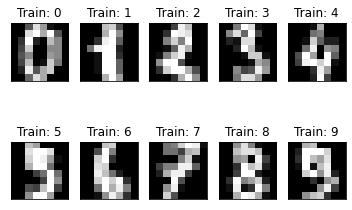

In [6]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results.

plot_mnist_sample()

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 1.3: Recognizing hand-written digits with Sklearn [5 pts]

One of the most amazing things about Sklearn library is that it provides an easy pattern for you to call different models. In this part, we will get some experience with several classifiers in Sklearn. You will complete `LogisticRegressionClassifier` and `kNNCalssifier`.

In [7]:
# DO NOT CHANGE
#### Some helper functions are given below####
def DataBatch(data, label, batchsize, shuffle=True):
    """
    This function provides a generator for batches of data that 
    yields data (batchsize, 3, 32, 32) and labels (batchsize)
    if shuffle, it will load batches in a random order
    """
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

def test(testData, testLabels, classifier):
    """
    Call this function to test the accuracy of a classifier
    """
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize,shuffle=False):
        prediction = classifier(data)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

In [8]:
# DO NOT CHANGE
# Split data into 50% train and 50% test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.images.reshape((len(digits.images), -1)), digits.target, test_size=0.5, shuffle=False)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

class RandomClassifier():
    """
    This is a sample classifier. 
    given an input it outputs a random class
    """
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])
    
class LogisticRegressionClassifier():
    def __init__(self, sol='liblinear'):
        """ ==========
        YOUR CODE HERE
        ========== """
        # Initialize and Create the Logistic Regression Classifier object.
        self.lrClassifier = LogisticRegression(solver = sol)
        
    def train(self, trainData, trainLabels):
        """ ==========
        YOUR CODE HERE
        ========== """
        # Fit the train data with the train labels.
        self.lrClassifier.fit(trainData, trainLabels)
        
    def __call__(self, x):
        """ ==========
        YOUR CODE HERE
        ========== """
        return self.lrClassifier.predict(x)
    
class kNNClassifier():
    def __init__(self, k=3):
        """
         k is the number of neighbors involved in voting
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        # Initialize and Create the KNN Classifier object.
        self.knnClassifier = KNeighborsClassifier(n_neighbors = k)
        
        
    def train(self, trainData, trainLabels):
        """ ==========
        YOUR CODE HERE
        ========== """
        # Fit the train data with the train labels.
        self.knnClassifier.fit(trainData, trainLabels)
       
        
    def __call__(self, x):
        """
        this method should take a batch of images and return a batch of predictions
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        return self.knnClassifier.predict(x)
        

In [10]:
# TEST CODE: DO NOT CHANGE
randomClassifierX = RandomClassifier()
print ('Random classifier accuracy: %f'%test(X_test, y_test, randomClassifierX))

Random classifier accuracy: 9.899889


In [11]:
# TEST CODE: DO NOT CHANGE
# TEST LogisticRegressionClassifier

lrClassifierX = LogisticRegressionClassifier()
lrClassifierX.train(X_train, y_train)
print ('Logistic Regression Classifier classifier accuracy: %f'%test(X_test, y_test, lrClassifierX))

Logistic Regression Classifier classifier accuracy: 91.657397


In [12]:
# TEST CODE: DO NOT CHANGE
# TEST kNNClassifier
""" ==========
YOUR CODE HERE
========== """
knnClassifierX = kNNClassifier()
knnClassifierX.train(X_train, y_train)
print ('KNN Classifier classifier accuracy: %f'%test(X_test, y_test, knnClassifierX))

KNN Classifier classifier accuracy: 96.329255


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 1.4: Confusion Matrix [5 pts]

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Here you will implement a function that computes the confusion matrix for a classifier. The matrix (M) should be $n \times n$ where $n$ is the number of classes. Entry `M[i,j]` should contain the fraction of images of class `i` that was classified as class `j`. The following example plots confusion matrix for the `RandomClassifier`, your task is to plot the results for `LogisticRegressionClassifier` and `kNNClassifier`.
<img src="fig/eg_confusion.PNG" alt="drawing" width="250"/>

In [13]:
from tqdm import tqdm

def Confusion(testData, testLabels, classifier):
    batchsize=50
    correct=0
    M=np.zeros((10,10))
    num=testData.shape[0]/batchsize
    count=0
    acc=0
    
    for data,label in tqdm(DataBatch(testData,testLabels,batchsize,shuffle=False),total=len(testData)//batchsize):
        """ ==========
        YOUR CODE HERE
        ========== """
        
        # Get the predicted labels from the classifier.
        label_prediction = classifier(data)
        
        # Construct the Confusion Matrix
        for idx in range(0, label_prediction.shape[0]):
            
            # Count the number of occurance at each coordinate
            M[label[idx], label_prediction[idx]] = M[label[idx], label_prediction[idx]] + 1
    
    # Get the total number of correct classification.
    acc = np.trace(M)
        
    # Calculate the correct classification fraction of each category
    for idx in range(0, M.shape[0]):
    
        # Get the the sum of each label
        sum_of_label = np.sum(M[idx,:])
        
        # Construct the final Confusion Matrix
        M[idx, :] = M[idx, :] / sum_of_label
    
    return M,acc*100.0/len(testData)

def VisualizeConfussion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)
    plt.show()
    print(np.round(M,2))

18it [00:00, 3504.50it/s]                                                       


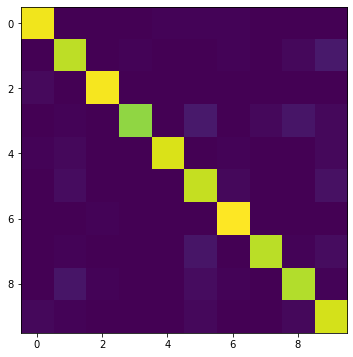

[[0.97 0.   0.   0.   0.01 0.01 0.01 0.   0.   0.  ]
 [0.   0.89 0.   0.01 0.   0.   0.01 0.   0.02 0.07]
 [0.02 0.   0.98 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.82 0.   0.07 0.   0.02 0.05 0.02]
 [0.01 0.02 0.   0.   0.93 0.   0.01 0.   0.   0.02]
 [0.   0.03 0.   0.   0.   0.9  0.02 0.   0.   0.04]
 [0.   0.   0.01 0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.06 0.   0.89 0.01 0.03]
 [0.   0.06 0.01 0.   0.   0.03 0.01 0.   0.88 0.01]
 [0.02 0.01 0.   0.   0.   0.02 0.   0.   0.02 0.92]]


In [14]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST LogisticRegressionClassifier

M,acc = Confusion(X_test, y_test, lrClassifierX)
VisualizeConfussion(M)

18it [00:00, 365.76it/s]                                                        


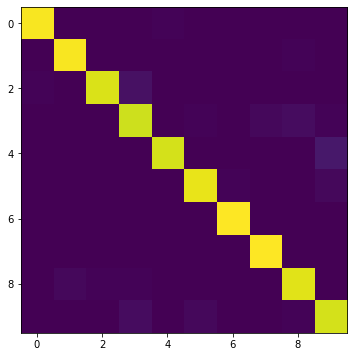

[[0.99 0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.01 0.   0.94 0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.92 0.   0.01 0.   0.02 0.03 0.01]
 [0.   0.   0.   0.   0.93 0.   0.   0.   0.   0.07]
 [0.   0.   0.   0.   0.   0.97 0.01 0.   0.   0.02]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.02 0.01 0.01 0.   0.   0.   0.   0.95 0.  ]
 [0.   0.   0.   0.03 0.   0.02 0.   0.   0.01 0.93]]


In [15]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST kNNClassifier

M,acc = Confusion(X_test, y_test, knnClassifierX)
VisualizeConfussion(M)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 1.5: K-Nearest Neighbors (KNN) [7 pts]

For this problem, you will complete a simple kNN classifer without Sklearn. The distance metric is Euclidean distance (L2 norm) in pixel space. $k$ refers to the number of neighbors involved in voting on the class. 

In [16]:
from collections import Counter
import time

class kNNClassifierManual():
    def __init__(self, k=3):
        self.k=k

    def train(self, trainData, trainLabels):
        #print("Called!")
        #print(trainData.shape, trainLabels.shape)
        self.X_train = trainData
        self.y_train = trainLabels
        
    def __call__(self, X):
        """ ==========
        YOUR CODE HERE
        ========== """
        
        # Initialize predicted labels
        predicted_labels = []
        
        # Calculate the L2 distance between the test and train values.
        for idx in range(0, X.shape[0]):
            
            # Initialize the L2 norm distance list
            L2_dist = []
            
            # Initialize voting list
            voting_list = []
            
            #print(self.X_train.shape, X.shape)
            
            # Loop through every samples
            for i in range(0, self.X_train.shape[0]):
                
                #print(self.X_train[i].shape, X[idx].shape)
                
                # Calculate the difference between the test and train values
                delta = self.X_train[i] - X[idx]
                
                # Square the delta
                delta_sq = delta**2
                
                # Calculate the distance
                distance = np.sqrt(np.sum(delta_sq))
                
                # Add to the L2 dist list together with the index.
                L2_dist.append([distance, i])
                
            # Sort from lowest distance to highest distance
            L2_dist.sort()
            
            # Select the nearest k from the L2_dist list
            L2_dist_k = L2_dist[0: self.k]
            
            for j in range(0, self.k):
                
                # Get the labels that have the k nearest distance
                voting_list.append(self.y_train[L2_dist_k[j][1]])
            
            # Get the most common/counter array of the lists
            # Then get the first list, and then the first array of labels.
            #print(voting_list)
            #print(Counter(voting_list))
            #print(Counter(voting_list).most_common(1))
            voting_results = Counter(voting_list).most_common(1)[0][0]
            
            # Add to the predicted label list
            predicted_labels.append(voting_results)
            
        # Convert to array
        predicted_labels = np.array(predicted_labels)
                
        return predicted_labels

In [17]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST kNNClassifierManual

knnClassifierManualX = kNNClassifierManual()
knnClassifierManualX.train(X_train, y_train)
print ('KNN classifier accuracy: %f'%test(X_test, y_test, knnClassifierManualX))

KNN classifier accuracy: 95.884316


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 1.6: Principal Component Analysis (PCA) K-Nearest Neighbors (KNN) [8 pts]
Here you will implement a simple KNN classifer in PCA space (for k=3 and 25 principal components).
You should implement PCA yourself using svd (you may not use sklearn.decomposition.PCA
or any other package that directly implements PCA transformations)

Is the testing time for PCA KNN classifier more or less than that for KNN classifier? Comment on why it differs if it does.

In [19]:
class PCAKNNClassifer():
    def __init__(self, components=25, k=3):
        # components = number of principal components
        # k is the number of neighbors involved in voting
        """ ==========
        YOUR CODE HERE
        ========== """
        # Initialize the object variables
        self.components = components
        self.k = k
        self.classifier = kNNClassifierManual(k = self.k)
        #self.classifier = KNeighborsClassifier(n_neighbors = self.k)
        
    def train(self, trainData, trainLabels):
        """ ==========
        YOUR CODE HERE
        ========== """
        # Compute the mean image
        mean_img = np.mean(trainData, axis=0)
        
        # Compute the covariance matrix
        cov_Mat = np.dot((trainData - mean_img).T, (trainData - mean_img)) / (trainData.shape[0] - 1)
        
        # Check the covariance matrix with numpy
        #cov_Mat = np.cov(trainData.T)
        #print(cov_Mat)
        
        # Compute SVD on the covariance matrix
        U, Sig, V_trans = np.linalg.svd(cov_Mat)
        
        # Get the first k rows of V_transpose which are the principal components and change to V
        self.V_mat = V_trans[:self.components].T
        
        # Determine the projection of the trainData, A = XV.
        #self.A_train_projected = np.dot(trainData, self.V_mat)
        self.X_train = np.dot(trainData, self.V_mat)
        self.y_train = trainLabels
        
        # Check the shape of the X_train and y_train
        #print(self.X_train.shape, self.y_train.shape)
        
        # Pass the train images and train labels to the classifier.
        self.classifier.train(self.X_train, self.y_train)
        #self.classifier.fit(self.X_train, self.y_train)

        
    def __call__(self, x):
        # this method should take a batch of images
        # and return a batch of predictions
        """ ==========
        YOUR CODE HERE
        ========== """
        #print(x.shape)
        # Determine the projection of the x test, A = XV.
        self.A_test_projected = np.dot(x, self.V_mat)
        
        # Check the shape of the A_test_projected
        #print(self.A_test_projected.shape)
        
        # Predict the labels with the knnClassifierManual
        #return self.classifier.predict(self.A_test_projected)
        return self.classifier(self.A_test_projected)

# test your classifier with only the first 100 training examples (use this
# while debugging)
pcaknnClassiferX = PCAKNNClassifer()
pcaknnClassiferX.train(X_train[:100], y_train[:100])
print ('PCA KNN classifier accuracy: %f'%test(X_test, y_test, pcaknnClassiferX))

PCA KNN classifier accuracy: 85.428254




PCA KNN Classifier Computational Time:  6.435882091522217  s


18it [00:06,  2.76it/s]                                                         

PCA KNN classifier accuracy: 95.661846


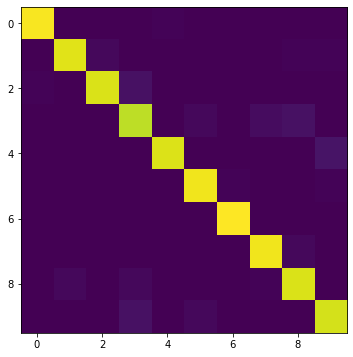

[[0.99 0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.96 0.02 0.   0.   0.   0.   0.   0.01 0.01]
 [0.01 0.   0.94 0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.9  0.   0.02 0.   0.03 0.04 0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.   0.98 0.01 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.02 0.  ]
 [0.   0.02 0.   0.02 0.   0.   0.   0.01 0.94 0.  ]
 [0.   0.   0.   0.04 0.   0.02 0.   0.   0.   0.93]]


In [26]:
# Determine the compute time
start_STOPWATCH = time.time()

# Rerun pca knn again without confusion matrix
pcaknnClassifer = PCAKNNClassifer()
pcaknnClassifer.train(X_train, y_train)
test(X_test, y_test, pcaknnClassifer)

# Stop the stopwatch
stop_STOPWATCH = time.time()
# Record time
print("\n\nPCA KNN Classifier Computational Time: ", time.time() - start_STOPWATCH, " s")

# test your classifier with all the training examples
pcaknnClassifer = PCAKNNClassifer()
pcaknnClassifer.train(X_train, y_train)

# display confusion matrix for your PCA KNN classifier with all the training examples
""" ==========
YOUR CODE HERE
========== """
# Get the confusion matrix and the overall accuracy of the pcaknnClassiferX
M_pca, acc_pca = Confusion(X_test, y_test, pcaknnClassifer)

print ('PCA KNN classifier accuracy: %f'%acc_pca)
VisualizeConfussion(M_pca)



KNN Classifier without PCA Computational Time:  6.230615854263306  s


18it [00:06,  2.93it/s]                                                         

KNN classifier without PCA accuracy: 95.884316


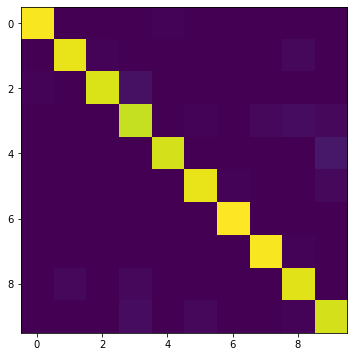

[[0.99 0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.97 0.01 0.   0.   0.   0.   0.   0.02 0.  ]
 [0.01 0.   0.94 0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.91 0.   0.01 0.   0.02 0.03 0.02]
 [0.   0.   0.   0.   0.93 0.   0.   0.   0.   0.07]
 [0.   0.   0.   0.   0.   0.97 0.01 0.   0.   0.02]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.99 0.01 0.  ]
 [0.   0.02 0.   0.02 0.   0.   0.   0.   0.95 0.  ]
 [0.   0.   0.   0.03 0.   0.02 0.   0.   0.01 0.93]]


In [28]:
# Determine the compute time
start_STOPWATCH = time.time()

# Rerun knn without pca again without confusion matrix
knnClassifierManual = kNNClassifierManual()
knnClassifierManual.train(X_train, y_train)
test(X_test, y_test, knnClassifierManual)

# Record time
print("\n\nKNN Classifier without PCA Computational Time: ", time.time() - start_STOPWATCH, " s")

# display confusion matrix for your KNN classifier without PCA all the training examples
knnClassifierManual = kNNClassifierManual()
knnClassifierManual.train(X_train, y_train)

# Get the confusion matrix and the overall accuracy of the knnClassifierManual
M_knn, acc_knn = Confusion(X_test, y_test, knnClassifierManual)

# Print the accuracy
print ('KNN classifier without PCA accuracy: %f'%acc_knn)
VisualizeConfussion(M_knn)


**Question:**<br>
Is the testing time for PCA KNN classifier more or less than that for KNN classifier? Comment on why it differs if it does.

**Solution:**<br>
The testing time for the PCA KNN classifier is shorter than the KNN classifier wihout PCA because PCA helps to reduce the dimensions of the training data set features. As a result, PCA-KNN classifier takes lesser computational time during the training process as compared to the KNN classifier without PCA.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## Problem 2: Deep learning [28 pts]

### Problem 2.1 Initial setup [1 pts]

Follow the directions on https://pytorch.org/get-started/locally/ to install Pytorch on your computer. 

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version. TA's will not provide any support related to GPU or CUDA.

Run the torch import statements below to verify your instalation.



In [ ]:
!pip install torch torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable

x = torch.rand(5, 3)
print(x)

In this problem, we will use the full dataset of MNIST database with 28x28 pixel images of digits.

Download the MNIST data from http://yann.lecun.com/exdb/mnist/.

Download the 4 zipped files, extract them into one folder, and change the variable 'path' in the code below. (Code taken from https://gist.github.com/akesling/5358964 )

Plot one random example image corresponding to each label from training data.

In [ ]:
import os
import struct

# Change path as required
path = "./mnist/"

def read(dataset = "training", datatype='images'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset == "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    if(datatype=='images'):
        get_data = lambda idx: img[idx]
    elif(datatype=='labels'):
        get_data = lambda idx: lbl[idx]

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_data(i)
        
X_train=np.array(list(read('training','images')))
print(X_train.shape)
y_train=np.array(list(read('training','labels')))
X_test=np.array(list(read('testing','images')))
print(X_test.shape)
y_test=np.array(list(read('testing','labels')))

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 2.2:  Training with PyTorch [8 pts]
Below is some helper code to train your deep networks. 
Complete the train function for DNN below. You should write down the training operations in this function. That means, for a batch of data you have to initialize the gradients, forward propagate the data, compute error, do back propagation and finally update the parameters. This function will be used in the following questions with different networks.
You can look at https://pytorch.org/tutorials/beginner/pytorch_with_examples.html for reference.

In [ ]:
# base class for your deep neural networks. It implements the training loop (train_net).


import torch.nn.init
import torch.optim as optim
from torch.autograd import Variable
from torch.nn.parameter import Parameter
from tqdm import tqdm
from scipy.stats import truncnorm

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        pass
    
    def forward(self, x):
        raise NotImplementedError
    
    def train_net(self, X_train, y_train, epochs=1, batchSize=50):
        """ ==========
        YOUR CODE HERE
        ========== """
        #self.lc
        # Initialize learning rate.
        learning_Rate = 1e-3
        
        # Create mean Cross Entropy object
        loss = nn.CrossEntropyLoss()
        #loss = nn.MSELoss()
        
        # Set the optimization parameters with Stochastic Gradient Descent (SGD)
        #optimizer = optim.SGD(self.parameters(), lr = learning_Rate)
        #print(self.parameters())
        optimizer = optim.Adam(nn.ParameterList(self.parameters()), lr = learning_Rate)
        
        # Iterate through number of epochs.
        for EPOCH in range(0, epochs):
            
            #for i, (data, label) in enumerate(DataBatch(X_train,y_train,batchSize,shuffle=True)):
            for data,label in tqdm(DataBatch(X_train,y_train,batchSize,shuffle=True), total=len(X_train)//batchSize):
                
                # Initialize the gradients
                optimizer.zero_grad()
                
                # Torch array instead of numpy array
                data = Variable(torch.FloatTensor(data))
                label = Variable(torch.LongTensor(label))
                
                # Check data shape
                #print(data.shape)
                #print(label.shape)
                
                # Forward propagate data
                y_predict = self.forward(data)
                
                # Compute error
                err = loss(y_predict, label)
                
                # Back propagate data
                err.backward()
                
                # Update Parameters
                optimizer.step()
                
            #print(err)     
        
    def __call__(self, x):
        #print("Called")
        inputs = Variable(torch.FloatTensor(x))
        prediction = self.forward(inputs)
        return np.argmax(prediction.data.cpu().numpy(), 1)

# helper function to get weight variable
def weight_variable(shape):
    initial = torch.Tensor(truncnorm.rvs(-1/0.01, 1/0.01, scale=0.01, size=shape))
    return Parameter(initial, requires_grad=True)

# helper function to get bias variable
def bias_variable(shape):
    initial = torch.Tensor(np.ones(shape)*0.1)
    return Parameter(initial, requires_grad=True)

In [ ]:
# example linear classifier - input connected to output
# you can take this as an example to learn how to extend DNN class
class LinearClassifier(DNN):
    def __init__(self, in_features=28*28, classes=10):
        super(LinearClassifier, self).__init__()
        # in_features=28*28
        self.weight1 = weight_variable((classes, in_features))
        self.bias1 = bias_variable((classes))
    
    def forward(self, x):
        # linear operation
        y_pred = torch.addmm(self.bias1, x.view(list(x.size())[0], -1), self.weight1.t())
        return y_pred


X_train=np.float32(np.expand_dims(X_train,-1))/255
X_train=X_train.transpose((0,3,1,2))

X_test=np.float32(np.expand_dims(X_test,-1))/255
X_test=X_test.transpose((0,3,1,2))

In [ ]:
# test the example linear classifier (note you should get around 90% accuracy
# for 10 epochs and batchsize 50)
linearClassifier = LinearClassifier()
linearClassifier.train_net(X_train, y_train, epochs=10)

print ('Linear classifier accuracy: %f'%test(X_test, y_test, linearClassifier))

In [ ]:
# display confusion matrix
""" ==========
YOUR CODE HERE
========== """
M_dnn, acc_dnn = Confusion(X_test, y_test, linearClassifier)
VisualizeConfussion(M_dnn)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 2.3: Single Layer Perceptron [3 pts]
The simple linear classifier implemented in the cell already performs quite well. Plot the filter weights corresponding to each output class (weights, not biases) as images. (Normalize weights to lie between 0 and 1 and use color maps like 'inferno' or 'plasma' for good results). Comment on what the weights look like and why that may be so.


In [ ]:
# Plot filter weights corresponding to each class, you may have to reshape them to make sense out of them
# linearClassifier.weight1.data will give you the first layer weights
""" ==========
YOUR CODE HERE
========== """
# Get the first layer weights
weights_array = linearClassifier.weight1.data

#print(weights_array.shape)

plt.figure(figsize=(15, 7))

for idx in range(0, weights_array.shape[0]):
    
    # Plot it.
    # Extract one weight from the array
    img = weights_array[idx, :]
    
    # Normalize it
    img = (img - img.min()) / (img.max()- img.min())
    
    # Create subplots
    plt.subplot(2, 5, idx+1)
    
    # Plot title
    plot_Header = "Number: "+ str(idx) 
    
    # Include headers
    plt.title(plot_Header) 
    
    # Reshape the array to 28 x 28 before plotting
    plt.imshow(img.reshape((28, 28)), cmap ='inferno') # Plot the sample image
    
plt.show()

#### Comments on weights
The images above illustrates that the weights that are feeding into their corresponding output neuron, which is responsible for classifying a specific digit, consist of the shape of that specific number. This is because each specific output neuron will generate high activaion in the first layer when it encounters an image that looks like a specific number from that weight image above, which is also known as a filter.


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 2.4: Multi Layer Perceptron (MLP) [8 pts]
Here you will implement an MLP. The MLP should consist of 2 layers (matrix multiplication and bias offset) that map to the following feature dimensions:

* 28x28 -> hidden (100)
* hidden -> classes

* The hidden layer should be followed with a ReLU nonlinearity. The final layer should not have a nonlinearity applied as we desire the raw logits output.
* The final output of the computation graph should be stored in self.y as that will be used in the training.

Display the confusion matrix and accuracy after training. Note: You should get ~ 97 % accuracy for 10 epochs and batch size 50.

Plot the filter weights corresponding to the mapping from the inputs to the first 10 hidden layer outputs (out of 100). Do the weights look similar to the weights plotted in the previous problem? Why or why not?

In [ ]:
class MLPClassifer(DNN):
    def __init__(self, in_features=28*28, classes=10, hidden=100):
        super(MLPClassifer, self).__init__()
        """ ==========
        YOUR CODE HERE
        ========== """
        # Defining model
        self.weight1 = weight_variable((hidden, in_features))
        self.bias1 = bias_variable((hidden))
        self.weight2 = weight_variable((classes, hidden))
        self.bias2 = bias_variable((classes))
    
    def forward(self, x):
        """ ==========
        YOUR CODE HERE
        ========== """
        # Linear operation
        hidden_layer = torch.addmm(self.bias1, x.view(list(x.size())[0], -1), self.weight1.t())
        m_ReLU = nn.ReLU()
        y_pred = torch.addmm(self.bias2, m_ReLU(hidden_layer), self.weight2.t())
        
        return y_pred

mlpClassifer = MLPClassifer()
mlpClassifer.train_net(X_train, y_train, epochs=10, batchSize=5)

In [ ]:
# Plot confusion matrix
M_mlp,acc_mlp = Confusion(X_test, y_test, mlpClassifer)
print ('MLP classifier accuracy: %f'%acc_mlp)
VisualizeConfussion(M_mlp)

In [ ]:
# Plot filter weights
""" ==========
YOUR CODE HERE
========== """
# Get the first layer weights
weights_array = mlpClassifer.weight1.data

#print(weights_array.shape)

plt.figure(figsize=(15, 7))

for idx in range(0, 10):
    
    # Plot it.
    # Extract one weight from the array
    img = weights_array[idx, :]
    
    # Normalize it
    img = (img - img.min()) / (img.max()- img.min())
    
    # Create subplots
    plt.subplot(2, 5, idx+1)
    
    # Plot title
    plot_Header = "Number: "+ str(idx) 
    
    # Include headers
    plt.title(plot_Header) 
    
    # Reshape the array to 28 x 28 before plotting
    plt.imshow(img.reshape((28, 28)), cmap ='inferno') # Plot the sample image
    
plt.show()


#### Comments on weights:

The weights do not look like as clearly as numbers like we observed in the previous case. Some of them look like number 2, some look like a combinantion of multiple numbers and some filters do not look like numbers at all. 

Linear classifier was a special case where the output neuron is simply dot product with input image plus a bias and hence we had all filters looking like numbers. It may not be so here.

In above figure, that look somewhat like 2 (filter 5, filter 7. filter 8) points that the network is trying to fit different hidden neurons to the same hand-written digits with possibly different neuron activations for different strokes. But it's unclear what exactly other filters and if they represent anything tangible.

So, eventhough we see few patterns for the filters, we still have 100 hidden neurons and a ReLU non-linearity. It is very difficult to figure out what the neural network actually learns for each filter at the hidden neurons because it has immense flexibility with the 100 units. This aspect essentially reflects in the 'hidden' part of the name 'hidden layer'. In conclusion, as networks grow deep and we keep adding non-linearities, the analysis of what network is doing becomes very difficult.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 2.5: Convolutional Neural Network (CNN) [8 pts]
Here you will implement a CNN with the following architecture:

* n=5
* ReLU( Conv(kernel_size=5x5, stride=2, output_features=n) )
* ReLU( Conv(kernel_size=5x5, stride=2, output_features=n*2) )
* ReLU( Linear(hidden units = 64) )
* Linear(output_features=classes)

So, 2 convolutional layers, followed by 1 fully connected hidden layer and then the output layer

Display the confusion matrix and accuracy after training. You should get around ~ 98 % accuracy for 10 epochs and batch size 50.<br><br>
**Note: You are not allowed to use torch.nn.Conv2d() and torch.nn.Linear(), Using these will lead to deduction of points. Use the declared conv2d(), weight_variable() and bias_variable() functions.** Although, in practice, when you move forward after this class you will use torch.nn.Conv2d() which makes life easier and hides all the operations underneath.

In [ ]:
def conv2d(x, W, stride, bias=None):
    # x: input
    # W: weights (out, in, kH, kW)
    return F.conv2d(x, W, bias, stride=stride, padding=2)

# Defining a Convolutional Neural Network
class CNNClassifer(DNN):
    def __init__(self, classes=10, n=5):
        super(CNNClassifer, self).__init__()
        """ ==========
        YOUR CODE HERE
        ========== """
        # Input Channel because of grayscale image
        in_channel = 1
        # Kernel Size
        kernel_size_r = 5 # Row
        kernel_size_c = 5 # Column
        # Hidden Units
        hidden_units = 64
        
        # Defining model
        self.weight1 = weight_variable((n, in_channel, kernel_size_r, kernel_size_c))
        self.bias1 = bias_variable((n))
        
        self.weight2 = weight_variable((n*2, n, kernel_size_r, kernel_size_c))
        self.bias2 = bias_variable((n*2))
        
        self.weight3 = weight_variable((hidden_units, 7*7*n*2))
        self.bias3 = bias_variable((hidden_units))
        
        self.weight4 = weight_variable((classes, hidden_units))
        self.bias4 = bias_variable((classes))
       
    def forward(self, x):
        """ ==========
        YOUR CODE HERE
        ========== """
        # Number of Strides
        num_Strides = 2
        
        # Convolution Operations
        convovle_1 = conv2d(x.view(list(x.size())[0], 1, 28, 28), self.weight1, stride = num_Strides, bias = self.bias1) 
        conv1_ReLU = nn.ReLU()
        convovle_2 = conv2d(conv1_ReLU(convovle_1), self.weight2, stride = num_Strides, bias = self.bias2)
        conv2_ReLU = nn.ReLU()
        
        # Linear Operation
        fully_connected = convovle_2.view(list(conv2_ReLU(convovle_2).size())[0], 490)
        hidden_layer = torch.addmm(self.bias3, fully_connected, self.weight3.t())
        m_ReLU = nn.ReLU()
        y = torch.addmm(self.bias4, m_ReLU(hidden_layer), self.weight4.t())
       
        return y
    
cnnClassifer = CNNClassifer()
cnnClassifer.train_net(X_train, y_train, epochs=10)

In [ ]:
# Plot confusion matrix
""" ==========
YOUR CODE HERE
========== """
M_cnn,acc_cnn = Confusion(X_test, y_test, cnnClassifer)
print ('Convolution Neural Network classifier accuracy: %f'%acc_cnn)
VisualizeConfussion(M_cnn)

* Note that the MLP/ConvNet approaches lead to an accuracy a little higher than the K-NN approach. 
* In general, Neural net approaches lead to significant increase in accuracy, but in this case since the problem is not too hard, the increase in accuracy is not very high.
* However, this is still quite significant considering the fact that the ConvNets we've used are relatively simple while the accuracy achieved using K-NN is with a search over 60,000 training images for every test image.
* You can look at the performance of various machine learning methods on this problem at http://yann.lecun.com/exdb/mnist/
* You can learn more about neural nets/ pytorch at<br> https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
* You can play with a demo of neural network created by Daniel Smilkov and Shan Carter at https://playground.tensorflow.org/